In [1]:
!pip install qiskit-ignis


  Using cached qiskit_ignis-0.7.1-py3-none-any.whl (198 kB)
  Obtaining dependency information for retworkx>=0.8.0 from https://files.pythonhosted.org/packages/01/65/3f52d88a2218a8fa85c0a79184038ba27baef9fa2d4454169536f2f3c249/retworkx-0.13.2-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\hp\AppData\Local\Temp\ipykernel_13880\653509242.py:3: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal
C:\Users\hp\AppData\Local\Temp\ipykernel_13880\653509242.py:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)
C:\Users\hp\AppData\Local\Temp\ipykernel_13880\653509242.py:26: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed di

Original counts:
{'111': 499, '000': 501}
Mitigated counts:
{'000': 500.99999998924386, '001': 3.58041366351254e-09, '010': 3.5768487110605514e-09, '011': 3.579266967162285e-09, '100': 3.57669021537782e-09, '101': 3.5775409587528596e-09, '110': 3.578408542554394e-09, '111': 498.99999998928655}


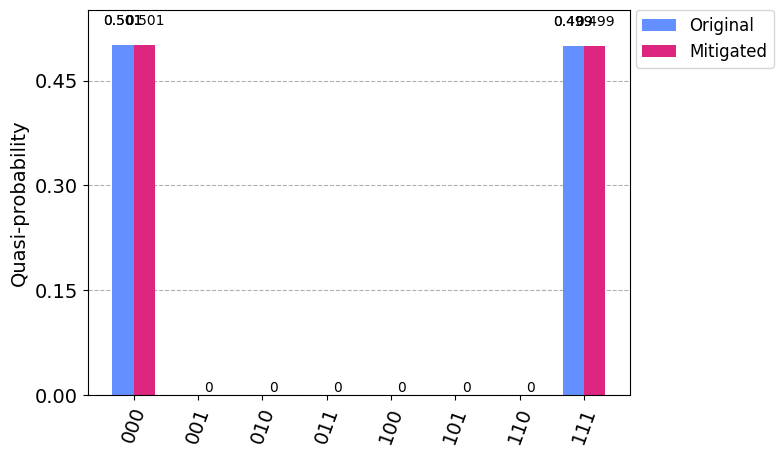

In [1]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal

# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

# Simulate the noisy circuit
qobj = assemble(transpiled_qc, shots=1000)
job = backend.run(qobj)
result = job.result()
counts = result.get_counts()

# Perform error mitigation
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1, 2])
cal_job = backend.run(assemble(cal_circuits, backend=backend))
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_counts = meas_fitter.filter.apply(counts)

# Print the original counts
print("Original counts:")
print(counts)

# Print the mitigated counts
print("Mitigated counts:")
print(mitigated_counts)

# Plot the histograms of the original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])
